In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import random

In [73]:
X,Y=datasets.make_classification(n_samples=500, n_features=4,n_classes=2,n_redundant=1)

In [74]:
df=pd.DataFrame(X,columns=['feature1','feature2','feature3','feature4'])
df['label']=Y

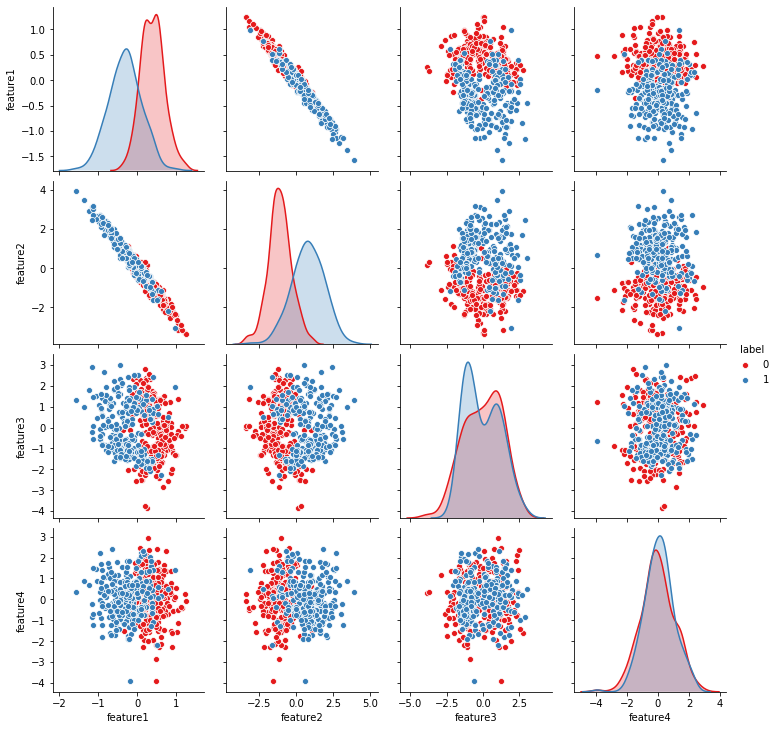

In [75]:
df.head(20)
sns.pairplot(df, hue='label',palette='Set1')



In [76]:
df.to_csv('random.csv',index=False)


In [77]:
df1=pd.read_csv('random.csv')

In [78]:
df1.head(20)


,feature1,feature2,feature3,feature4,label
0,0.263906,-0.817465,0.477935,0.648593,0
1,0.448367,-1.132391,-0.326262,0.965783,0
2,0.475027,-1.527915,1.111007,0.062819,0
3,0.218116,-1.118306,2.359824,2.132743,0
4,0.885289,-2.136086,-1.087100,-2.278943,0
5,-0.396724,0.958171,0.483040,0.014052,1
6,-0.049203,-0.113701,1.092020,-0.660937,1
7,0.069960,0.315282,-2.234505,-0.107043,0
8,0.246718,-0.793379,0.576213,-1.234021,0
9,-0.817032,2.189084,0.037068,1.070902,1


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 1)


In [80]:
print(y_train)

[1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1]


In [81]:
class Perceptron:
    def __init__(self,input_size,epochs=100,alpha=0.02):
        self.epochs = epochs
        self.alpha = alpha
        self.input_size = input_size
        weight = [random.random() for i in range(input_size+1)]
        weight[0] = 1.0
        self.weight = weight
#         self.weight = np.zeros(input_size+1)
    def activation(self,x):
        return int(1 / (1 + np.exp(-x)))
    def predict(self,x):
#         print(self.weight.T)
#         print(X)
       
        z = np.dot(self.weight,x)
#         print(z)
#         print(self.activation(z))
        a = self.activation(z)
        return a
   
    
    def learn(self,X,d):
        final = []
        for k in range(self.epochs):
            print('Interation',(k+1))
            sum = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x)
                e = (d[i] - y)
                self.weight = self.weight + self.alpha*e*x
                sum = sum + e
            final.append(abs(sum))
            print("Error=",str(sum))
            print('Weights=',self.weight)



In [82]:
perceptron=Perceptron(input_size=4)
perceptron.learn(X_train,y_train)


Interation 1
Error= 191
Weights= [ 4.82       -0.99297684  3.03085462  0.53375939  0.47312138]
Interation 2
Error= 191
Weights= [ 8.64       -2.10305742  6.01078441  0.55892068  0.90012593]
Interation 3
Error= 188
Weights= [12.4        -3.13137548  8.78011133  0.54280348  1.30751939]
Interation 4
Error= 166
Weights= [15.72       -3.75019115 10.50853578  0.25830143  1.53129559]
Interation 5
Error= 144
Weights= [18.6        -4.08516677 11.4490677   0.08252105  1.73349152]
Interation 6
Error= 126
Weights= [ 2.11200000e+01 -4.23216580e+00  1.18665387e+01 -1.56231883e-02
  2.06817473e+00]
Interation 7
Error= 116
Weights= [23.44       -4.30285951 12.06835705 -0.06748807  2.27996239]
Interation 8
Error= 104
Weights= [ 2.55200000e+01 -4.29581234e+00  1.20390197e+01 -2.13998677e-02
  2.48582117e+00]
Interation 9
Error= 96
Weights= [27.44       -4.24413362 11.88743076  0.03451263  2.64294728]
Interation 10
Error= 88
Weights= [29.2        -4.14748853 11.62220091  0.05803507  2.81160974]
Interatio

Error= 0
Weights= [ 3.67400000e+01  1.28968196e-01  1.26253665e-01  3.26222767e-02
 -8.27633159e-03]
Interation 82
Error= -2
Weights= [ 3.67000000e+01  1.23151346e-01  1.51168958e-01 -8.52536870e-03
 -1.43372001e-02]
Interation 83
Error= 2
Weights= [3.67400000e+01 1.21629056e-01 1.47252285e-01 2.70308836e-02
 5.79162706e-03]
Interation 84
Error= -1
Weights= [3.67200000e+01 1.17663867e-01 1.56817850e-01 3.19085010e-02
 1.63833896e-02]
Interation 85
Error= 0
Weights= [ 3.67200000e+01  1.21949685e-01  1.46245241e-01  2.76731296e-02
 -3.62009772e-02]
Interation 86
Error= 1
Weights= [ 3.67400000e+01  1.22281487e-01  1.42795659e-01  3.90231490e-02
 -8.98393509e-03]
Interation 87
Error= -2
Weights= [ 3.67000000e+01  1.19513412e-01  1.53704186e-01  2.36496293e-02
 -1.17987563e-02]
Interation 88
Error= 0
Weights= [ 3.67000000e+01  1.25803566e-01  1.38493458e-01  1.60738188e-02
 -1.50981474e-02]
Interation 89
Error= 2
Weights= [ 3.67400000e+01  1.21611443e-01  1.47457339e-01  2.63310139e-02
 -7.

In [83]:
y_pred = []
for i in range(X_train.shape[0]):
    x= np.insert(X_train[i],0,1)
    y_pred.append(perceptron.predict(x))
y_actu = pd.Series(y_train,name = 'Actual')
y_pred = pd.Series(y_pred,name = 'Predicted')

conftrain = pd.crosstab(y_pred,y_actu)
print('Confusion Matrix for Training data\n',conftrain)
accuracy=(conftrain[0][0]+conftrain[1][1])/(conftrain[0][0]+conftrain[1][0]+conftrain[0][1]+conftrain[1][1])
    

Confusion Matrix for Training data
 Actual       0    1
Predicted          
0          169   45
1           15  146


In [84]:
print("Training data Accuracy = " +str(accuracy))


Training data Accuracy = 0.84


In [85]:
y_pred = []
for i in range(X_test.shape[0]):
    x= np.insert(X_test[i],0,1)
    y_pred.append(perceptron.predict(x))
y_actu = pd.Series(y_test,name = 'Actual')
y_pred = pd.Series(y_pred,name = 'Predicted')

conftest = pd.crosstab(y_pred,y_actu)
print('Confusion Matrix for Testing data\n',conftest)
accuracy=(conftest[0][0]+conftest[1][1])/(conftest[0][0]+conftest[1][0]+conftest[0][1]+conftest[1][1])
    

Confusion Matrix for Testing data
 Actual      0   1
Predicted        
0          58  10
1           7  50


In [86]:
print("Testing data Accuracy = " +str(accuracy))

Testing data Accuracy = 0.864


In [87]:

y_pred = []
for i in range(X.shape[0]):
    x= np.insert(X[i],0,1)
    y_pred.append(perceptron.predict(x))
y_actu = pd.Series(Y,name = 'Actual')
y_pred = pd.Series(y_pred,name = 'Predicted')

df_confusion = pd.crosstab(y_pred,y_actu)
print('Metrices for whole data\n')
print('\nConfusion Matrix\n\n',df_confusion)
precision=df_confusion[0][0]/(df_confusion[0][0]+df_confusion[0][1])
print('\nPrecision : ',precision)
recall=df_confusion[0][0]/(df_confusion[0][0]+df_confusion[1][0])
print('\nRecall : ',recall)
accuracy=(df_confusion[0][0]+df_confusion[1][1])/(df_confusion[0][0]+df_confusion[1][0]+df_confusion[0][1]+df_confusion[1][1])
print('\nAccuracy : ',accuracy)

Metrices for whole data


Confusion Matrix

 Actual       0    1
Predicted          
0          227   55
1           22  196

Precision :  0.9116465863453815

Recall :  0.8049645390070922

Accuracy :  0.846


In [88]:
#THANK YOU